In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,
    classification_report, cohen_kappa_score, matthews_corrcoef, mean_squared_error
)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\uni\movement_with_feedback.csv")
df.head()

,server_timestamp,session_id,goalkeeper_id,shot_result,type,RA_accel_x,RA_accel_y,RA_accel_z,RA_gyro_x,RA_gyro_y,...,LL_accel_x,LL_accel_y,LL_accel_z,LL_gyro_x,LL_gyro_y,LL_gyro_z,LL_mag_x,LL_mag_y,LL_mag_z,coach_feedback
0,2025-06-03T05:26:04.362832,1,55,unknown,sensor_reading,0.003472,0.009226,0.010214,0.0,0.000823,...,0.007343,0.004746,-0.006959,-0.001118,6.938894e-18,1.387779e-17,-0.041890,-0.072605,0.116185,undefined
1,2025-06-03T05:26:04.487498,1,55,unknown,sensor_reading,0.003545,0.008802,0.007359,0.0,0.001161,...,0.003439,0.003801,-0.005594,-0.000155,6.938894e-18,1.387779e-17,-0.029843,-0.052747,0.090682,undefined
2,2025-06-03T05:26:04.594069,1,55,unknown,sensor_reading,0.003468,0.008294,0.004907,0.0,0.001415,...,0.000198,0.002824,-0.004240,0.000650,6.938894e-18,1.387779e-17,-0.020778,-0.034008,0.064675,undefined
3,2025-06-03T05:26:04.693267,1,55,unknown,sensor_reading,0.003244,0.007702,0.002857,0.0,0.001585,...,-0.002378,0.001815,-0.002897,0.001296,6.938894e-18,1.387779e-17,-0.014694,-0.016390,0.038163,undefined
4,2025-06-03T05:26:04.743162,1,55,unknown,sensor_reading,0.002870,0.007026,0.001210,0.0,0.001671,...,-0.004290,0.000773,-0.001566,0.001784,6.938894e-18,1.387779e-17,-0.011592,0.000109,0.011147,undefined


In [3]:
df.coach_feedback.value_counts()

coach_feedback
undefined    3029
bad          1135
good          861
average       574
Name: count, dtype: int64

In [4]:
print("\nData Types:")
display(df.dtypes)

print("\nMissing Values:")
display(df.isna().sum())


Data Types:


server_timestamp     object
session_id            int64
goalkeeper_id         int64
shot_result          object
type                 object
RA_accel_x          float64
RA_accel_y          float64
RA_accel_z          float64
RA_gyro_x           float64
RA_gyro_y           float64
RA_gyro_z           float64
RA_mag_x            float64
RA_mag_y            float64
RA_mag_z            float64
LA_accel_x          float64
LA_accel_y          float64
LA_accel_z          float64
LA_gyro_x           float64
LA_gyro_y           float64
LA_gyro_z           float64
LA_mag_x            float64
LA_mag_y            float64
LA_mag_z            float64
RL_accel_x          float64
RL_accel_y          float64
RL_accel_z          float64
RL_gyro_x           float64
RL_gyro_y           float64
RL_gyro_z           float64
RL_mag_x            float64
RL_mag_y            float64
RL_mag_z            float64
LL_accel_x          float64
LL_accel_y          float64
LL_accel_z          float64
LL_gyro_x           


Missing Values:


server_timestamp    0
session_id          0
goalkeeper_id       0
shot_result         0
type                0
RA_accel_x          0
RA_accel_y          0
RA_accel_z          0
RA_gyro_x           0
RA_gyro_y           0
RA_gyro_z           0
RA_mag_x            0
RA_mag_y            0
RA_mag_z            0
LA_accel_x          0
LA_accel_y          0
LA_accel_z          0
LA_gyro_x           0
LA_gyro_y           0
LA_gyro_z           0
LA_mag_x            0
LA_mag_y            0
LA_mag_z            0
RL_accel_x          0
RL_accel_y          0
RL_accel_z          0
RL_gyro_x           0
RL_gyro_y           0
RL_gyro_z           0
RL_mag_x            0
RL_mag_y            0
RL_mag_z            0
LL_accel_x          0
LL_accel_y          0
LL_accel_z          0
LL_gyro_x           0
LL_gyro_y           0
LL_gyro_z           0
LL_mag_x            0
LL_mag_y            0
LL_mag_z            0
coach_feedback      0
dtype: int64

In [5]:
print("Descriptive Statistics for Sensor Data:")
display(df.describe())

Descriptive Statistics for Sensor Data:


,session_id,goalkeeper_id,RA_accel_x,RA_accel_y,RA_accel_z,RA_gyro_x,RA_gyro_y,RA_gyro_z,RA_mag_x,RA_mag_y,...,RL_mag_z,LL_accel_x,LL_accel_y,LL_accel_z,LL_gyro_x,LL_gyro_y,LL_gyro_z,LL_mag_x,LL_mag_y,LL_mag_z
count,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000,5.599000e+03,5599.000000,5599.000000,5599.000000,5599.000000,...,5.599000e+03,5599.000000,5599.000000,5599.000000,5599.000000,5.599000e+03,5599.000000,5.599000e+03,5.599000e+03,5.599000e+03
mean,1.139132,449.699946,-0.086887,-0.020527,-0.055854,5.394646e-03,0.007816,0.001878,0.835934,0.229635,...,-2.835874e-01,-0.000714,0.011743,-0.006299,0.000814,2.605052e-04,-0.000483,-6.512806e-03,-3.611250e-04,-3.026094e-04
std,0.346115,379.480244,4.416500,3.900341,5.656921,1.385065e+00,1.199868,1.176210,17.053569,14.593752,...,1.696670e+00,2.270208,2.973354,2.756108,0.474348,3.873877e-01,0.789205,2.878553e+00,2.235559e+00,2.909067e+00
min,1.000000,55.000000,-22.226807,-16.728584,-17.683902,-5.293285e+00,-5.318614,-4.464949,-61.547480,-63.246256,...,-4.904250e+00,-18.595145,-14.138016,-17.830180,-2.574186,-1.564790e+00,-6.867957,-5.036458e+01,-1.575633e+01,-6.592568e+01
25%,1.000000,204.000000,-2.207196,-2.158776,-3.286224,-6.986776e-01,-0.562224,-0.597236,-9.708775,-8.247957,...,-6.257440e-01,-0.886647,-1.232094,-0.602091,-0.203528,-1.714220e-01,-0.207851,0.000000e+00,-1.465143e-01,-9.227159e-17
50%,1.000000,204.000000,0.005945,-0.002247,-0.002526,-1.387779e-17,0.000307,0.000138,0.045112,0.276168,...,-5.684342e-14,0.000856,0.003259,-0.002420,-0.000104,-6.436531e-18,0.000000,2.775558e-17,1.387779e-17,2.775558e-17
75%,1.000000,1000.000000,2.648904,1.979604,3.044437,6.773621e-01,0.594777,0.574632,12.294775,11.138470,...,1.705303e-13,1.085993,1.385002,0.687618,0.201974,1.380162e-01,0.270725,2.722459e-01,5.605747e-17,3.256800e-01
max,2.000000,1000.000000,16.921166,22.670081,33.148332,4.883873e+00,5.561599,6.088212,47.393188,32.448383,...,6.736236e+00,11.440834,15.072523,28.056771,2.897150,2.320534e+00,3.453713,2.733354e+01,2.853991e+01,7.986669e+00


In [6]:
stats = df.describe()
stats.to_csv("sensor_data_statistics.csv")

In [7]:
limbs_prefix = ['RA', 'LA', 'RL', 'LL']

for limb in limbs_prefix:
    limb_cols = [col for col in df.columns if col.startswith(limb)]
    print(f"\nDescriptive Statistics for {limb}:")
    display(df[limb_cols].describe())


Descriptive Statistics for RA:


,RA_accel_x,RA_accel_y,RA_accel_z,RA_gyro_x,RA_gyro_y,RA_gyro_z,RA_mag_x,RA_mag_y,RA_mag_z
count,5599.000000,5599.000000,5599.000000,5.599000e+03,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000
mean,-0.086887,-0.020527,-0.055854,5.394646e-03,0.007816,0.001878,0.835934,0.229635,0.271024
std,4.416500,3.900341,5.656921,1.385065e+00,1.199868,1.176210,17.053569,14.593752,20.473152
min,-22.226807,-16.728584,-17.683902,-5.293285e+00,-5.318614,-4.464949,-61.547480,-63.246256,-52.845272
25%,-2.207196,-2.158776,-3.286224,-6.986776e-01,-0.562224,-0.597236,-9.708775,-8.247957,-11.561745
50%,0.005945,-0.002247,-0.002526,-1.387779e-17,0.000307,0.000138,0.045112,0.276168,-0.025532
75%,2.648904,1.979604,3.044437,6.773621e-01,0.594777,0.574632,12.294775,11.138470,12.695478
max,16.921166,22.670081,33.148332,4.883873e+00,5.561599,6.088212,47.393188,32.448383,64.891959



Descriptive Statistics for LA:


,LA_accel_x,LA_accel_y,LA_accel_z,LA_gyro_x,LA_gyro_y,LA_gyro_z,LA_mag_x,LA_mag_y,LA_mag_z
count,5599.000000,5599.000000,5599.000000,5.599000e+03,5.599000e+03,5599.000000,5599.000000,5599.000000,5599.000000
mean,-0.061740,0.040575,0.155560,6.784860e-03,-1.183764e-02,0.002534,-0.145490,0.263743,-0.515178
std,3.890393,3.525357,5.263706,1.136332e+00,1.371712e+00,1.228201,13.893376,13.268633,18.217164
min,-18.401683,-15.975485,-21.782799,-5.096163e+00,-7.358920e+00,-7.087611,-51.211123,-47.250501,-40.911748
25%,-1.653441,-1.782411,-2.379794,-4.573106e-01,-6.005429e-01,-0.544018,-7.839515,-5.516072,-12.934644
50%,0.003494,-0.001341,0.302127,-2.220446e-16,2.733171e-18,0.000000,0.978063,0.211434,-2.774834
75%,2.084112,1.746088,3.282364,4.872843e-01,6.704777e-01,0.548064,8.940013,7.909504,8.152185
max,15.369005,19.570032,21.008110,4.208806e+00,4.829258e+00,5.815386,39.330572,49.097621,59.306424



Descriptive Statistics for RL:


,RL_accel_x,RL_accel_y,RL_accel_z,RL_gyro_x,RL_gyro_y,RL_gyro_z,RL_mag_x,RL_mag_y,RL_mag_z
count,5599.000000,5599.000000,5599.000000,5.599000e+03,5599.000000,5.599000e+03,5599.000000,5599.000000,5.599000e+03
mean,-0.052038,-0.013905,0.030551,-1.928660e-03,-0.001556,-3.786382e-03,0.668862,-0.149156,-2.835874e-01
std,2.303993,3.035079,2.669332,7.353549e-01,0.474865,6.793578e-01,12.373552,10.513811,1.696670e+00
min,-18.467778,-15.825833,-12.642682,-5.115258e+00,-2.906515,-4.998834e+00,-31.940465,-43.033218,-4.904250e+00
25%,-0.943090,-1.372987,-0.825002,-1.990508e-01,-0.149661,-2.451750e-01,-5.106782,-4.804062,-6.257440e-01
50%,-0.053434,0.002068,0.002252,6.938894e-18,0.000000,7.943621e-18,0.086969,-0.020804,-5.684342e-14
75%,0.668670,1.081000,0.626242,2.118757e-01,0.182262,2.588193e-01,6.151576,5.785389,1.705303e-13
max,18.003154,18.993275,25.128762,4.026470e+00,2.410322,3.860064e+00,43.809546,39.470045,6.736236e+00



Descriptive Statistics for LL:


,LL_accel_x,LL_accel_y,LL_accel_z,LL_gyro_x,LL_gyro_y,LL_gyro_z,LL_mag_x,LL_mag_y,LL_mag_z
count,5599.000000,5599.000000,5599.000000,5599.000000,5.599000e+03,5599.000000,5.599000e+03,5.599000e+03,5.599000e+03
mean,-0.000714,0.011743,-0.006299,0.000814,2.605052e-04,-0.000483,-6.512806e-03,-3.611250e-04,-3.026094e-04
std,2.270208,2.973354,2.756108,0.474348,3.873877e-01,0.789205,2.878553e+00,2.235559e+00,2.909067e+00
min,-18.595145,-14.138016,-17.830180,-2.574186,-1.564790e+00,-6.867957,-5.036458e+01,-1.575633e+01,-6.592568e+01
25%,-0.886647,-1.232094,-0.602091,-0.203528,-1.714220e-01,-0.207851,0.000000e+00,-1.465143e-01,-9.227159e-17
50%,0.000856,0.003259,-0.002420,-0.000104,-6.436531e-18,0.000000,2.775558e-17,1.387779e-17,2.775558e-17
75%,1.085993,1.385002,0.687618,0.201974,1.380162e-01,0.270725,2.722459e-01,5.605747e-17,3.256800e-01
max,11.440834,15.072523,28.056771,2.897150,2.320534e+00,3.453713,2.733354e+01,2.853991e+01,7.986669e+00


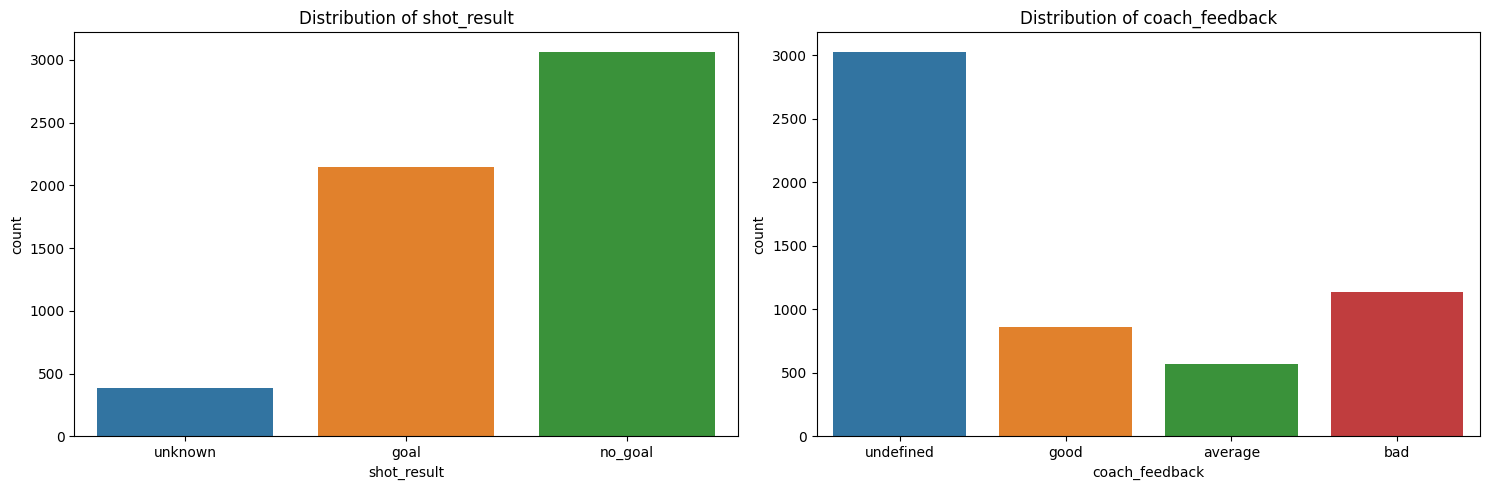

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_cols = ['shot_result', 'coach_feedback']

fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    if col in df.columns:
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Correlation Matrix for Right Arm Sensors:


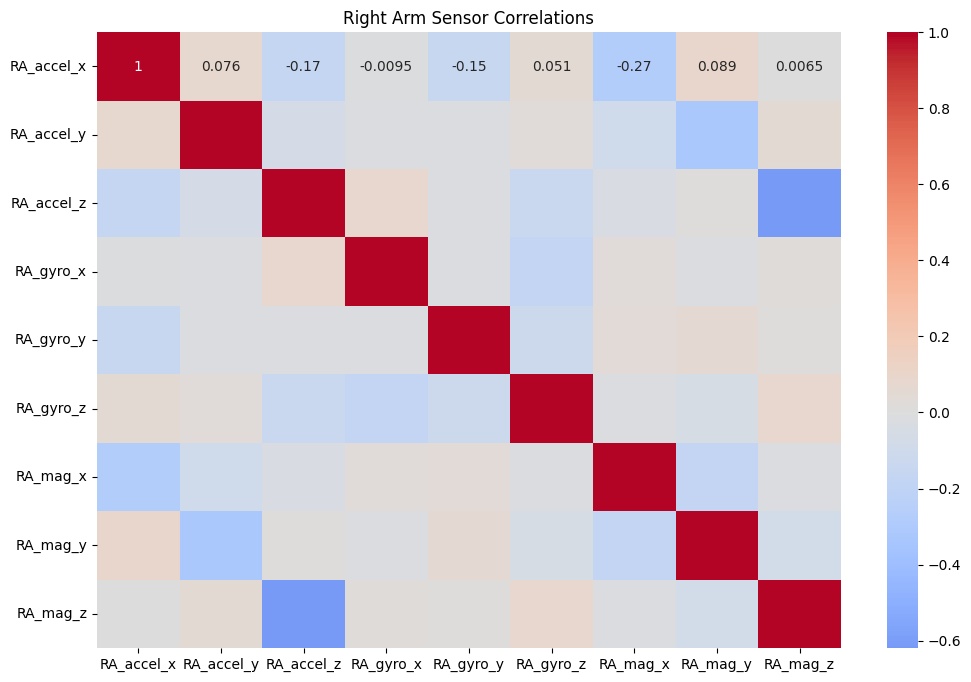

In [9]:
print("Correlation Matrix for Right Arm Sensors:")
ra_cols = [col for col in df.columns if col.startswith('RA_')]
plt.figure(figsize=(12, 8))
sns.heatmap(df[ra_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Right Arm Sensor Correlations')
plt.show()

In [10]:
df = df.drop(columns=['server_timestamp', 'type', 'shot_result'])

df = df[df['coach_feedback'].isin(['good', 'average', 'bad'])]
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['coach_feedback']) 

In [11]:
X = df.drop(columns=['session_id', 'goalkeeper_id', 'coach_feedback', 'label'])
y = df['label']

In [12]:
classifiers = {
    "SVM": (SVC(), {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['rbf', 'linear']
    }),
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        'clf__C': [0.1, 1, 10]
    }),
    "KNN": (KNeighborsClassifier(), {
        'clf__n_neighbors': [3, 5, 7]
    })
}

In [13]:
print("the classification results:")
for name, (model, params) in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    grid = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X, y)
    
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    preds = best_model.predict(X)
    
    print(f"\n{name} best accuracy: {accuracy_score(y, preds):.4f}")
    print(f"best {name} hyperparameters: {best_params}")
    # print(classification_report(y, preds, target_names=label_encoder.classes_))

the classification results:

SVM best accuracy: 0.9323
best SVM hyperparameters: {'clf__C': 1, 'clf__kernel': 'rbf'}

LogisticRegression best accuracy: 0.6327
best LogisticRegression hyperparameters: {'clf__C': 0.1}

KNN best accuracy: 0.9875
best KNN hyperparameters: {'clf__n_neighbors': 3}


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = lr.predict(X_test_scaled)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [19]:
train_acc = lr.score(X_train_scaled, y_train)
test_acc = lr.score(X_test_scaled, y_test)
overfit_ratio = train_acc / test_acc

In [20]:
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Ratio: {overfit_ratio:.4f}\n")

Train Accuracy: 0.6372
Test Accuracy: 0.6284
Overfitting Ratio: 1.0139



In [21]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Matthews CorrCoef: {mcc:.4f}")
print(f"RMSE: {rmse:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.6284
F1 Score (macro): 0.6176
Precision (macro): 0.6434
Recall (macro): 0.6116
Cohen's Kappa: 0.4053
Matthews CorrCoef: 0.4149
RMSE: 0.7550

Classification Report:
               precision    recall  f1-score   support

     average       0.77      0.64      0.70       115
         bad       0.62      0.80      0.70       227
        good       0.54      0.39      0.45       172

    accuracy                           0.63       514
   macro avg       0.64      0.61      0.62       514
weighted avg       0.63      0.63      0.62       514



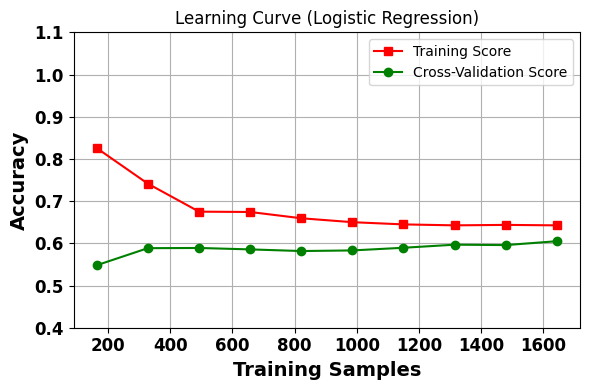

In [23]:
train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, 'rs-', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'go-', label='Cross-Validation Score')

plt.title('Learning Curve (Logistic Regression)')
plt.xlabel('Training Samples' ,fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylim(0.4, 1.1)
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(r"C:\uni\talent_rec-main (1)\talent_rec-main\newsaved")
plt.show()

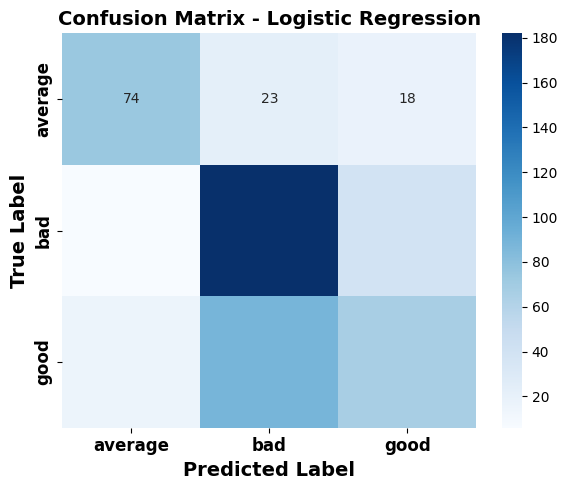

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Confusion Matrix - Logistic Regression", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(r"C:\uni\talent_rec-main (1)\talent_rec-main\newsaved")
plt.show()